In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy.polynomial.legendre as legendre
def interpylegendre(U, k, endpoints):
    points_per_interval = 2*k
    number_of_intervals = len(endpoints) - 1
    _,number_of_polynomials = U.shape
    coeff = np.zeros([points_per_interval, number_of_intervals, number_of_polynomials])
    
    x, _ = legendre.leggauss(2 * k)
    for n in range(number_of_polynomials):
        for i in range(number_of_intervals):
            u_local = U[2*k*i:2*k*(i+1), n]
            c = np.polynomial.legendre.legfit(x - endpoints[i], u_local, deg=2*k - 1)
            c = np.polynomial.legendre.leg2poly(c)
            # c = np.polynomial.polynomial.polyfit(x - endpoints[i], u_local, deg=2*k - 1)
            c = np.flip(c)
            coeff[:,i,n] = c

    print(coeff.shape)
    return sp.interpolate.PPoly(coeff, endpoints)

In [3]:
a = [0,1]
print(a.pop())

0


In [3]:
k = 10
c1 = np.random.uniform(size=2*k)
P = np.polynomial.polynomial.Polynomial(c1,[0,1])
xx = np.linspace(0,1,1000)

[[1.28498652e+08]
 [9.08431476e+07]
 [4.82814043e+07]
 [1.90085881e+07]
 [5.42063752e+06]
 [1.08471320e+06]
 [1.45939798e+05]
 [1.24813851e+04]
 [6.28981088e+02]
 [1.68400096e+01]
 [9.52205503e-01]
 [8.06051449e-01]
 [7.66492007e-01]
 [7.79212198e-01]
 [8.70087262e-01]
 [1.10402653e+00]
 [1.67115159e+00]
 [3.02753039e+00]
 [5.81012643e+00]
 [9.30134365e+00]]
(20, 2)
(20, 1, 2)


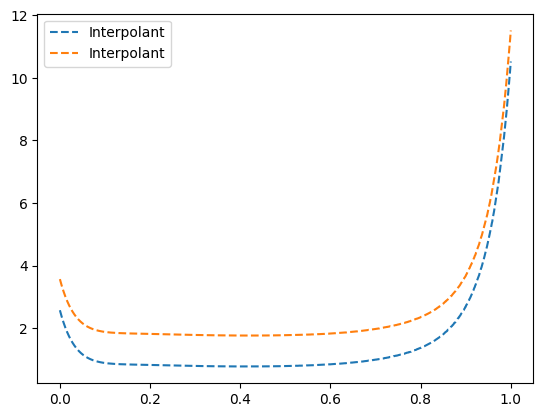

In [4]:
x,_ = np.polynomial.legendre.leggauss(2*k)
U = P(x)[:,np.newaxis]
print(U)
U = np.hstack([U,U+1])
print(U.shape)
P2 = interpylegendre(U, k, [-1,1])
plt.plot(xx,P2(xx),"--", label="Interpolant")
# plt.plot(x,P(x),"*", label="target")
plt.legend()


In [5]:
coeff = np.random.random(size=(3,3,3))
P = sp.interpolate.PPoly(coeff,[0,1,2,3])
P([0.1,1.1,2.2])

array([[0.87522417, 0.59369031, 0.50260141],
       [1.00782653, 1.03294318, 0.64527452],
       [0.45487085, 1.13453224, 0.56136319]])

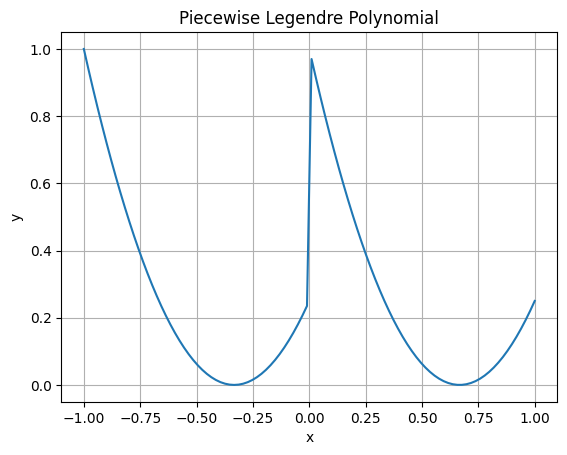

In [6]:
import numpy as np
from scipy.interpolate import BPoly

def legendre_polynomial(x, n):
    """Evaluate the nth Legendre polynomial at points x."""
    return np.polynomial.legendre.Legendre.basis(n)(x)

def piecewise_legendre_polynomial(coefficients, breakpoints):
    """Construct a piecewise Legendre polynomial."""
    degree = len(coefficients) - 1
    num_segments = len(breakpoints) - 1
    knots = np.array(breakpoints)
    coefs = np.zeros((num_segments, degree + 1))

    for i in range(num_segments):
        for j in range(degree + 1):
            coefs[i][j] = coefficients[j]

    return BPoly(coefs.T, knots)

# Example usage:
coefficients = [1, -0.5, 0.25]  # Coefficients of Legendre polynomial
breakpoints = [-1, 0, 1]        # Breakpoints where the polynomial changes its form

piecewise_legendre = piecewise_legendre_polynomial(coefficients, breakpoints)

# Evaluate the piecewise Legendre polynomial at some points
x_values = np.linspace(-1, 1, 100)
y_values = piecewise_legendre(x_values)

import matplotlib.pyplot as plt

plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Piecewise Legendre Polynomial')
plt.grid(True)
plt.show()


In [7]:
endpoints = [-1,0,1,2]
import bisect
print(bisect.bisect(endpoints,0.1))

2
